<a href="https://colab.research.google.com/github/amoladmane/Deep-Learning/blob/main/3_Multi_class_Classification_with_Keras_(_Mobile_Price_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification with Keras
## Mobile Price Predection

In [1]:
import pandas as pd

## Step1 = read dataset

In [2]:
url = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_train.csv'
df = pd.read_csv(url)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Step2 - Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Step3 - Separte X an Y (target feature - movile price)

In [7]:
X = df.drop(columns=['price_range'])
Y = df[['price_range']]


In [8]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [10]:
Y.value_counts()

price_range
0              500
1              500
2              500
3              500
Name: count, dtype: int64

<Axes: xlabel='price_range'>

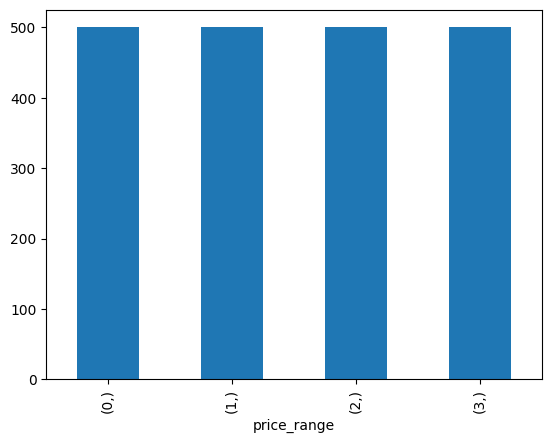

In [11]:
Y.value_counts().plot(kind='bar')

## Step4-First Apply Preprocessing on X then Y because Keras model always give first pribability. So we need to pre process Y also

## Create a preprocessing Pipeline for X , One Hot encode the target feature

In [12]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')


In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Step 5: Apply Train test split

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [41]:

xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1.558089,-0.990050,-1.253064,0.981177,0.619880,-1.043966,0.769162,-0.006069,1.434017,-1.539175,0.013773,0.274736,1.174484,-0.585741,-0.547577,0.742313,-1.466521,0.559641,0.994018,0.986097
240,-1.378345,1.010051,0.830779,-1.019184,-0.992890,0.957886,0.934531,-1.393304,-0.035292,1.521249,-1.470690,-0.261699,-0.561260,1.323964,-0.310171,-1.094526,0.913303,0.559641,0.994018,0.986097
819,-0.005733,-0.990050,-0.762748,0.981177,-0.532099,0.957886,1.375517,-1.393304,1.349249,-1.539175,0.673534,-0.288746,-1.024125,-0.662277,0.402047,1.431127,1.645557,0.559641,-1.006018,0.986097
692,-1.041452,-0.990050,-0.517590,-1.019184,-0.532099,-1.043966,0.328176,-0.352878,1.631808,0.209639,-0.481048,-0.768833,0.977767,1.276014,0.164641,0.512708,-1.100394,-1.786861,-1.006018,0.986097
420,0.495054,1.010051,-1.253064,0.981177,0.619880,-1.043966,-1.380644,-0.352878,-0.995993,0.209639,0.343653,0.400956,-0.341399,-0.495373,-1.497202,-0.176107,1.645557,0.559641,-1.006018,0.986097


In [17]:
xtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
541,-1.014136,-0.990050,-0.395011,0.981177,-0.762495,0.957886,0.328176,0.340740,1.010178,-0.227564,-0.481048,1.309289,1.304086,0.935753,-1.497202,-1.094526,0.181050,0.559641,0.994018,0.986097
1211,-1.196241,1.010051,0.095305,-1.019184,0.619880,0.957886,-1.656260,-0.352878,1.151457,1.521249,-0.151168,1.275480,0.292726,-1.511547,-0.547577,0.053498,-1.283457,0.559641,0.994018,0.986097
1862,-0.445060,-0.990050,1.443675,-1.019184,-0.301703,-1.043966,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,0.559641,-1.006018,-1.014099
1094,-1.253148,1.010051,-0.027274,-1.019184,-0.992890,-1.043966,-1.656260,1.727974,-1.448088,-0.664768,-1.305750,-0.843213,-0.885265,-1.598226,-1.734608,-0.864922,-0.551204,0.559641,0.994018,0.986097
465,0.784145,1.010051,0.095305,-1.019184,0.159088,0.957886,0.548669,1.034357,-0.628666,-0.664768,0.013773,-0.834197,-0.901466,1.408799,0.402047,0.971917,-0.368140,0.559641,-1.006018,-1.014099


In [18]:
ytrain.head()

,price_range
1490,1
965,3
1216,1
500,0
403,2


In [19]:
ytest.head()

,price_range
541,3
1211,0
1862,0
1094,0
465,3


In [20]:
xtrain.shape

(1600, 20)

In [21]:
xtest.shape

(400, 20)

In [22]:
ytrain.shape

(1600, 1)

In [23]:
ytest.shape

(400, 1)

## Apply Pipeline on Ytrain , Ytest not on Y original.
## So we will apply one hot encoding

In [42]:
from keras.utils import to_categorical

In [43]:
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [26]:
ytrain.head()

,price_range
1490,1
965,3
1216,1
500,0
403,2


In [27]:
ytrain_cat[0:5]

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

## Step 6: Build the neural network

In [44]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

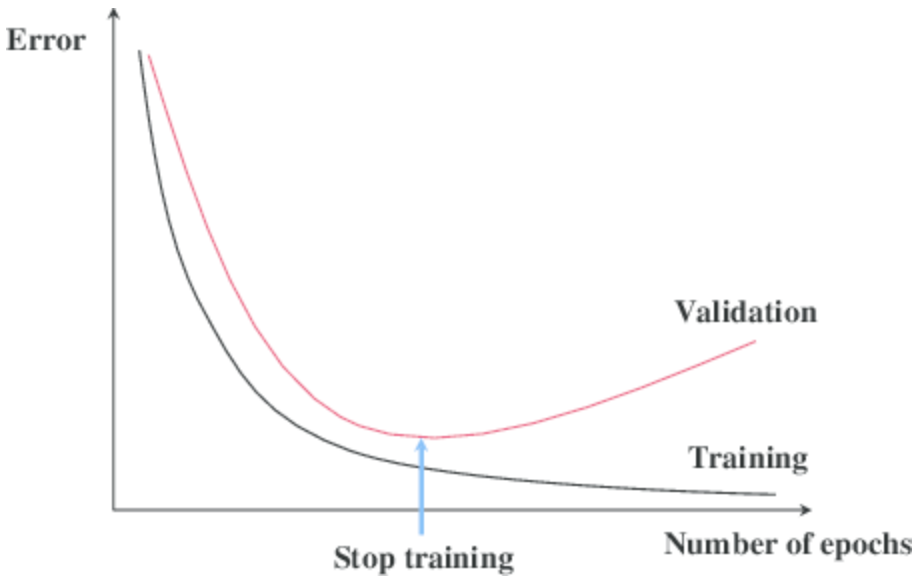

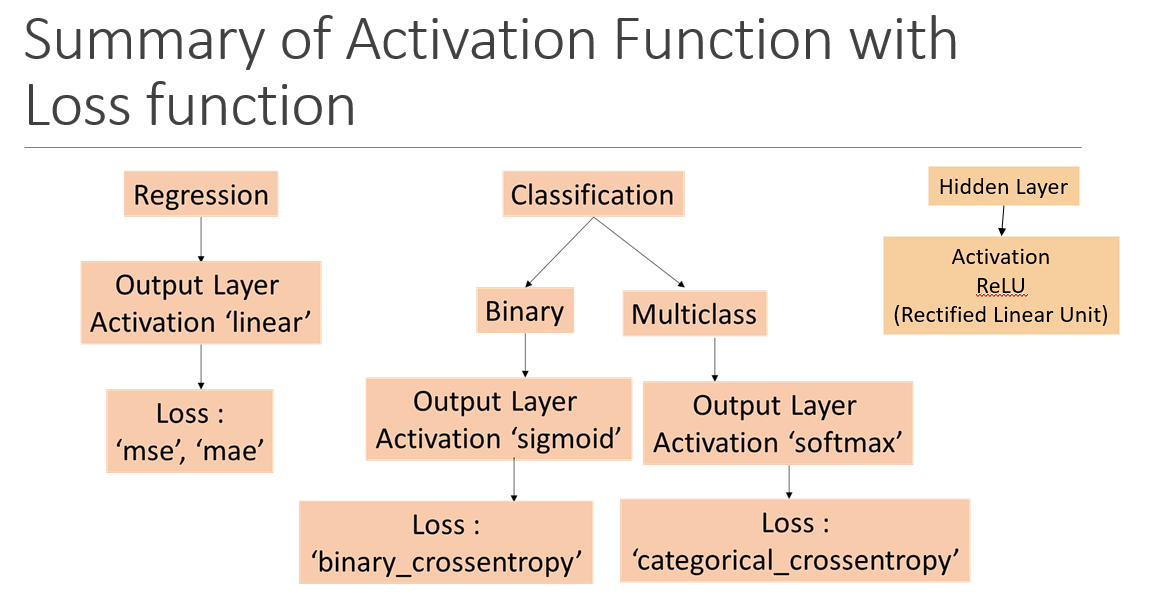

In [29]:
## Initilise Model
model = Sequential()

In [30]:
xtrain.shape[1]

20

In [45]:
model = Sequential()

# Create input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add Hidden Layer 1
model.add(Dense(units=64, activation='relu'))
# Add Dropout layer 1
model.add(Dropout(rate=0.3))
# Add Hidden Layer 2
model.add(Dense(units=32, activation='relu'))
# Add Dropout Layer 2
model.add(Dropout(rate=0.2))
# Add Output Layer'
model.add(Dense(units=ytrain_cat.shape[1], activation='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
es = EarlyStopping(monitor='val_loss', patience=15)

In [48]:
hist = model.fit(xtrain, ytrain_cat, validation_split=0.2, epochs=200, callbacks=[es])

Epoch 1/200
40/40 [==============================] - 4s 40ms/step - loss: 1.4220 - accuracy: 0.2914 - val_loss: 1.3056 - val_accuracy: 0.3875
Epoch 2/200
40/40 [==============================] - 1s 16ms/step - loss: 1.2937 - accuracy: 0.3930 - val_loss: 1.1834 - val_accuracy: 0.5312
Epoch 3/200
40/40 [==============================] - 1s 16ms/step - loss: 1.1397 - accuracy: 0.4953 - val_loss: 1.0311 - val_accuracy: 0.5875
Epoch 4/200
40/40 [==============================] - 0s 12ms/step - loss: 1.0065 - accuracy: 0.5531 - val_loss: 0.8682 - val_accuracy: 0.6938
Epoch 5/200
40/40 [==============================] - 1s 15ms/step - loss: 0.8646 - accuracy: 0.6336 - val_loss: 0.7399 - val_accuracy: 0.7375
Epoch 6/200
40/40 [==============================] - 0s 7ms/step - loss: 0.7616 - accuracy: 0.6562 - val_loss: 0.6434 - val_accuracy: 0.7937
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.6875 - val_loss: 0.5665 - val_accuracy: 0.8250
Epoch 8/

In [36]:
## plot the curving cure

In [37]:
import matplotlib.pyplot as plt

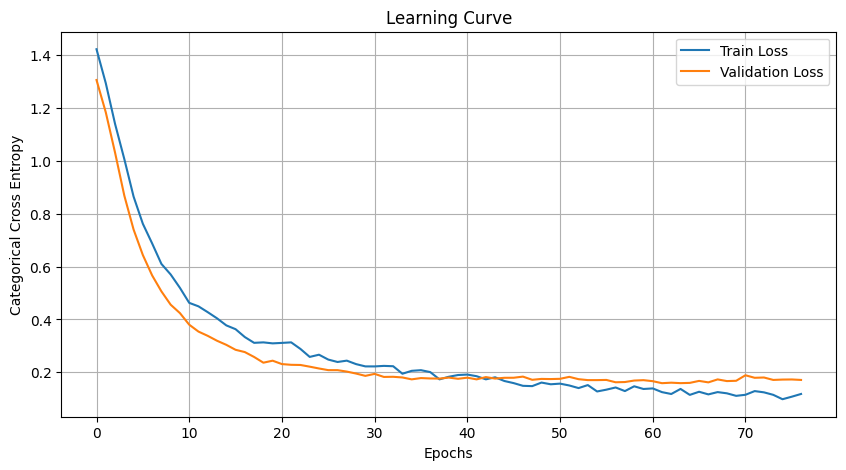

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label ='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy')
plt.title('Learning Curve')
plt.grid()
plt.legend()
plt.show()

## Step 7: Evaluate model

In [51]:
model.evaluate(xtrain,ytrain_cat)

50/50 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9800


[0.05456006899476051, 0.9800000190734863]

In [52]:
model.evaluate(xtest,ytest_cat)

13/13 [==============================] - 1s 6ms/step - loss: 0.1393 - accuracy: 0.9325


[0.1392691731452942, 0.9325000047683716]

## Predict the probability for train and test

In [59]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

13/13 [==============================] - 0s 3ms/step


In [56]:
yprob_train[0:5]

array([[1.8244221e-07, 8.2418174e-01, 1.7581813e-01, 3.7463153e-08],
       [6.2670887e-25, 1.0817716e-06, 9.6201473e-01, 3.7984248e-02],
       [9.2207569e-01, 7.7924259e-02, 1.0635268e-09, 1.2759293e-22],
       [4.0642330e-27, 7.7883628e-09, 3.7430380e-02, 9.6256959e-01],
       [8.6111155e-05, 9.9947971e-01, 4.3403741e-04, 8.8481644e-12]],
      dtype=float32)

In [60]:
yprob_test[0:5]

array([[9.9500591e-01, 4.9940939e-03, 1.0803772e-12, 1.7237302e-27],
       [8.1942018e-15, 3.9892695e-03, 9.9585330e-01, 1.5736136e-04],
       [4.6189874e-04, 9.9944270e-01, 9.5458017e-05, 8.4006949e-15],
       [1.2291778e-37, 3.8386933e-14, 3.1974970e-04, 9.9968028e-01],
       [1.1642396e-06, 9.9934429e-01, 6.5456080e-04, 2.9093523e-11]],
      dtype=float32)

In [61]:
import numpy as np

In [62]:
ypred_train = np.argmax(yprob_train, axis = 1)

In [63]:
ypred_train[0:5]

array([1, 2, 0, 3, 1])

In [66]:
ypred_test = np.argmax(yprob_test, axis = 1)

In [67]:
ypred_test[0:5]

array([0, 2, 1, 3, 1])

## Plot confusion matrix for test data

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

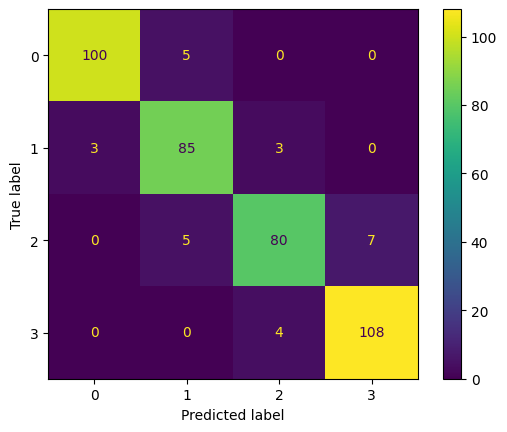

In [71]:
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

## Print classifcation report

In [73]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.89      0.93      0.91        91
           2       0.92      0.87      0.89        92
           3       0.94      0.96      0.95       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



From above data i have f1 score macro average 0.91 > 0.8 hence above model is good and can be used for any predictionsFrom above data i have f1 score macro average 0.91 > 0.8 hence above model is good and can be used for any predictions

### Save above model

In [76]:
model.save('MobileModel.keras')

### Load model

In [79]:
from keras.models import load_model
m = load_model('/content/MobileModel.keras')
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1344      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Out of sample prediction

In [84]:
url2 = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_test.csv'
xnew = pd.read_csv(url2)
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [89]:

xnew2 = xnew.drop(columns=['id'])

In [91]:
xnew_pre = num_pipe.fit_transform(xnew2)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099
1,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,0.293833,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099
2,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097
3,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099
4,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097


## Predict the probability with results

In [92]:
probs = model.predict(xnew_pre)
probs[0:5]

32/32 [==============================] - 0s 3ms/step


array([[8.7164344e-28, 4.1266541e-09, 8.9716569e-02, 9.1028339e-01],
       [9.4745955e-37, 4.2192330e-12, 2.1392494e-03, 9.9786079e-01],
       [1.7429801e-20, 8.8634224e-06, 7.8291416e-01, 2.1707685e-01],
       [0.0000000e+00, 4.8375862e-16, 4.9176480e-05, 9.9995071e-01],
       [3.6501198e-05, 9.9816859e-01, 1.7948033e-03, 3.9759845e-10]],
      dtype=float32)

In [93]:
preds = np.argmax(probs, axis=1)
max_probs = np.max(probs, axis=1)


## Save above results in dataframe and csv format

In [94]:
df_final = xnew[['id']]
df_final

,id
0,1
1,2
2,3
3,4
4,5
...,...
995,996
996,997
997,998
998,999


In [95]:
df_final['price_range'] = preds
df_final['probability'] = max_probs

<ipython-input-95-cb67154ee643>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['price_range'] = preds
<ipython-input-95-cb67154ee643>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['probability'] = max_probs


In [96]:
df_final['price_range'].value_counts()


price_range
3    261
2    261
0    254
1    224
Name: count, dtype: int64

<Axes: xlabel='price_range'>

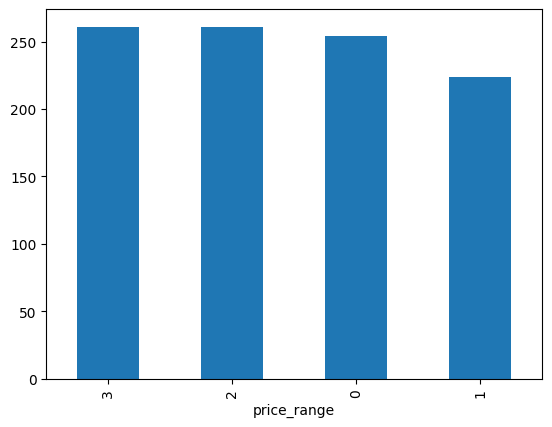

In [97]:
df_final['price_range'].value_counts().plot(kind='bar')


In [98]:
df_final.to_csv('MobileResults.csv', index=False)
